In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
device

device(type='cuda')

In [8]:
!nvidia-smi

Tue Sep  2 14:26:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.57                 Driver Version: 576.57         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8              1W /   95W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
batch_size = 64
num_classes = 10

![Imgur](https://imgur.com/yrIrojL.png)

In [10]:
#Defining the convolutional neural network
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            # Above is Layer-1 - The input for LeNet-5 is a 32×32 grayscale image which passes through 
            # the first convolutional layer with 6 feature maps or filters having size 5×5 and a stride of one. 
            # The image dimensions changes from 32x32x1 to 28x28x6.
            nn.BatchNorm2d(6),
            nn.ReLU(),
            # Layer-2 - Then average pooling layer or sub-sampling layer with a filter size 2×2 and a stride of two. 
            # The resulting image dimensions will be reduced to 14x14x6.          
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )      
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            # Layer-3 Next, there is a second convolutional layer with 16 feature maps having size 5×5 and a stride of 1. 
            # In this layer, only 10 out of 16 feature maps are connected to 6 feature maps of the previous layer
            nn.BatchNorm2d(16),
            nn.ReLU(),
            # Layer-4 The fourth layer (S4) is again an average pooling layer with filter size 2×2 and a stride of 2. 
            # This layer is the same as the second layer (S2) except it has 16 feature maps so the output will be reduced to 5x5x16.
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        
        self.fc = nn.Linear(400, 120)
        ''' Layer-5 The fifth layer (C5) is a fully connected convolutional layer with 120 feature maps each of size 1×1. 
        Each of the 120 units in C5 is connected to all the 400 nodes (5x5x16) in the fourth layer S4. '''
        self.relu = nn.ReLU()
        '''Layer-6 The sixth layer is a fully connected layer (F6) with 84 units. '''
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        ''' Layer-7 - Finally, a fully connected layer ŷ with 10 possible values corresponding to the digits from 0 to 9. 
        Since the MNIST data has 10 classes for each of the 10 numerical digits. '''
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        print('output after layer2', output.size()) # torch.Size([32, 16, 5, 5]
        # inside forward method image dimension are : [batch_size, channels, height, width]
        output = output.reshape(output.size(0), -1)
        # print('output after resize', output.size()) # torch.Size([32, 400])
        output = self.fc(output)
        output = self.relu(output)
        output = self.fc1(output)
        output = self.relu1(output)
        output = self.fc2(output)
        return output

### Loading the Dataset
Using torchvision , we will load the dataset as this will allow us to perform any pre-processing steps easily.

In [11]:
class LeNet5(nn.Module):
    """
    LeNet-5 model for image classification.

    Parameters:
    - num_classes (int): Number of output classes.

    Forward Args:
    - x (torch.Tensor): Input tensor of shape (batch_size, channels, height, width).

    Forward Returns:
    - output (torch.Tensor): Output tensor of shape (batch_size, num_classes).
    """
    def __init__(self,num_classes):
        super(LeNet5,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), stride=(1,1), padding=(0,0)), #Layer 1
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2)) #Layer-2
        )                
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=(1,1), padding=(0,0)), #Layer 3
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2,2)) #Layer 4
        )
        self.fc = nn.Linear(400, 120) # Layer 5
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84) # Layer 6
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes) # Final Layer
        
    def forward(self, x):
        """
        Forward pass of the LeNet-5 model.

        Parameters:
        - x (torch.Tensor): Input tensor of shape (batch_size, channels, height, width).

        Returns:
        - output (torch.Tensor): Output tensor of shape (batch_size, num_classes).
        """
        output = self.layer1(x)
        output = self.layer2(output)
        # print('output after layer2', output.size()) # torch.Size([32, 16, 5, 5]
        output = output.reshape(output.size(0), -1) # See note below for this line
        # print('output after resize', output.size()) # torch.Size([32, 400])
        output = self.fc(output)
        output = self.relu(output)
        output = self.fc1(output)
        output = self.relu1(output)
        output = self.fc2(output)
        return output
        

In [12]:
# Define relevant variables for the ML task

''' Keeping num_classes at 10, as this will be the output shape from the final Layer of the LeNet5 Neural Network model, 
because the output layer will have 10 output neurons, since the MNIST data has 10 classes for each of the 10 numerical digits. '''

train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


test_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)


train_dataloader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_dataloader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

100%|██████████| 9.91M/9.91M [00:15<00:00, 627kB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 112kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 550kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.53MB/s]


## Build the architecture of LeNet5 from Scratch

In [13]:
learning_rate = 0.001

model = LeNet5(num_classes).to(device)

#Setting the loss function
criterion = nn.CrossEntropyLoss()

#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#this is defined to print how many steps are remaining when training
total_step = len(train_dataloader)

In [14]:
print('Length of train_dataloader ', len(train_dataloader))
print('Length of test_dataloader ', len(test_dataloader))

Length of train_dataloader  938
Length of test_dataloader  157


## Setting Hyperparameters


In [ ]:
def train(model, criterion, optimizer, num_epochs=10):
    total_training_loss = []
    total_step = len(train_dataloader)
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        
        for i, (images, labels) in enumerate(train_dataloader):  
            images = images.to(device)
            labels = labels.to(device)
            
            #Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
                
            # Backward and optimize
            optimizer.zero_grad() # Clear the past gradient by set the gradients to zero before every update
            loss.backward() #  calculate the new gradients
            # print('images.size ', images.size(0))
            '''  """ Update the running loss 
            we need to use loss.item() instead of loss alone in running_loss calculation and averaging. 
            Because loss gives you a grad_function, not a float value. 
            The item() method extracts the loss's value as a Python float.
            """ '''
            running_loss += loss.item() * images.size(0)
            optimizer.step() # we update the weights 
            
                
            if (i+1) % 400 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                            .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        epoch_loss = running_loss / len(train_dataloader)
        total_training_loss.append(epoch_loss)
        """ To summarize, in the above code what I did is
      
        1. => multiply each average batch loss with batch-length. 
        The batch-length is inputs.size(0) which gives the number total images in each batch. 
        Essentially I am un-averaging the Batch-Loss

        Do this all the batches inside the batch-running loop.
        And then after that loop, i.e. outside the batch-loop and coming back to my epoch-loop
        
        2. => Divide this accumulated un-averaged Batch-loss from all batches, 
        by the number of samples (len(train_dataloader)) to get the exact train loss average for the epoch """
    return total_training_loss

In [16]:
total_training_loss = train(model, criterion, optimizer, num_epochs=30)

Epoch [1/30], Step [400/938], Loss: 0.1315
Epoch [1/30], Step [800/938], Loss: 0.0518
Epoch [2/30], Step [400/938], Loss: 0.0214
Epoch [2/30], Step [800/938], Loss: 0.0469
Epoch [3/30], Step [400/938], Loss: 0.0400
Epoch [3/30], Step [800/938], Loss: 0.1028
Epoch [4/30], Step [400/938], Loss: 0.0508
Epoch [4/30], Step [800/938], Loss: 0.0239
Epoch [5/30], Step [400/938], Loss: 0.0074
Epoch [5/30], Step [800/938], Loss: 0.0144
Epoch [6/30], Step [400/938], Loss: 0.0043
Epoch [6/30], Step [800/938], Loss: 0.0311
Epoch [7/30], Step [400/938], Loss: 0.0009
Epoch [7/30], Step [800/938], Loss: 0.1462
Epoch [8/30], Step [400/938], Loss: 0.0055
Epoch [8/30], Step [800/938], Loss: 0.0082
Epoch [9/30], Step [400/938], Loss: 0.0241
Epoch [9/30], Step [800/938], Loss: 0.0304
Epoch [10/30], Step [400/938], Loss: 0.0009
Epoch [10/30], Step [800/938], Loss: 0.1321
Epoch [11/30], Step [400/938], Loss: 0.0007
Epoch [11/30], Step [800/938], Loss: 0.0039
Epoch [12/30], Step [400/938], Loss: 0.0068
Epoch 

In [17]:
total_training_loss

[10.613120853233694,
 3.501496905623786,
 2.61097890977015,
 2.0543903043624687,
 1.8686305461421624,
 1.6542931095148916,
 1.3801375661697637,
 1.2117618730710968,
 1.211999953369489,
 0.916393191703205,
 0.890029323249827,
 0.7901711751655268,
 0.8009449174301997,
 0.7349000350887532,
 0.604691159136572,
 0.5877134032078462,
 0.5959742276378331,
 0.5104420412431449,
 0.4753665602458805,
 0.4618746914979355,
 0.4209960618646873,
 0.314100546453662,
 0.49788026574879235,
 0.2408505241778284,
 0.4408501303814531,
 0.32112366941815934,
 0.39530158790053005,
 0.26027559753762086,
 0.2319124836471822,
 0.25664730258035684]

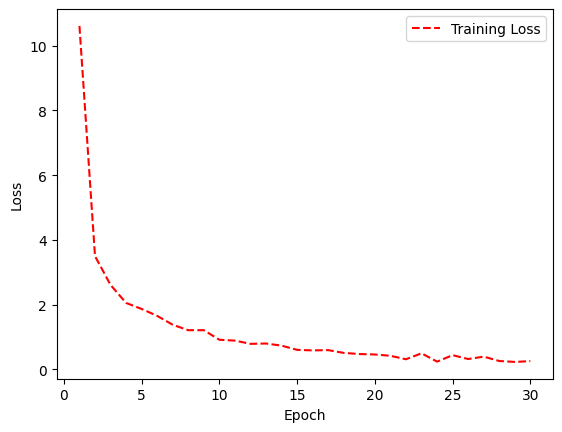

In [18]:

epoch_count = range(1, len(total_training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, total_training_loss, 'r--')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();